In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
file_path = "../csvs/shuffled_data.csv"
data = pd.read_csv(file_path)

X = data.drop('target', axis=1)
y = data['target']

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2)

LDA = LinearDiscriminantAnalysis()
LDA.fit(XTrain, yTrain)

yPrediction = LDA.predict(XTest)

accuracy = accuracy_score(yTest, yPrediction)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


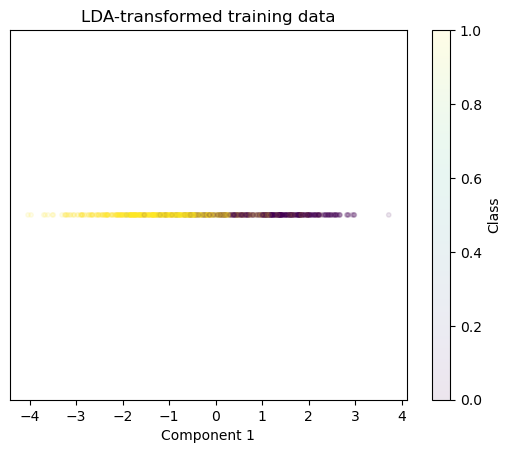

LDA Coefficients :
slope                1.661987
noofmajorvessels     1.294616
chestpain            0.953406
fastingbloodsugar    0.855390
restingrelectro      0.738829
gender               0.578387
exerciseangia        0.538191
oldpeak              0.089231
restingBP            0.039594
age                  0.004841
maxheartrate         0.004204
serumcholestrol      0.001345
dtype: float64


In [ ]:
import matplotlib.pyplot as plt

XTrainLDA = LDA.transform(XTrain)
XTestLDA = LDA.transform(XTest)

plt.scatter(XTrainLDA[:, 0], [0] * len(XTrainLDA), c=yTrain, cmap='viridis', edgecolor=None, s=10, alpha=0.1)
plt.title("LDA Transformed Training Data")
plt.xlabel("Component")
plt.yticks([]) 
plt.colorbar(label='Class')
plt.show()

featuresNames = X.columns.tolist()
LDACoefficients = pd.DataFrame(LDA.coef_, columns=featuresNames)
LDACoefficientsRanking = LDACoefficients.abs().mean(axis=0).sort_values(ascending=False)
print("LDA Coefficients :")
print(LDACoefficientsRanking)